In [2]:
### Import Block 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
### Data Reference: Automobile. (1987). UCI Machine Learning Repository

### Data Formatting Block
file_path = "/Users/jk/Desktop/A/Study/Data Analysis/Practice Folder/automobile.csv"
pd.set_option("display.max_rows", None)
df = pd.read_csv(file_path)
df = pd.DataFrame(df.replace("?", np.NaN))
df.dropna(inplace = True) # Drop the rows that contains NaN values for data wrangling


### Data Normalization Block
## standarize scale of the value
df["length"] = df["length"]/df["length"].max()
df["height"] = df["height"]/df["height"].max()
df["width"] = df["width"]/df["width"].max() 

In [7]:
### Linear Regression
lm = LinearRegression()

X = df[["highway-mpg"]]
Y = df["price"]

lm.fit(X, Y)
lm.coef_ # Slope
lm.intercept_ 
Yhat = lm.predict(X)

cor = df[["highway-mpg", "price"]].corr() 

print(f"intercept: {lm.intercept_}\ncoefficient: {lm.coef_}\npredicted price: {Yhat[0:5]}\n", cor) 
display(df.head())


intercept: 32468.309406001994
coefficient: [-655.28135573]
predicted price: [12809.86873425 18052.11958005 16086.27551287 19362.6822915
 13465.15008997]
              highway-mpg    price
highway-mpg      1.00000 -0.72009
price           -0.72009  1.00000


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


(0.0, 37134.50106920031)

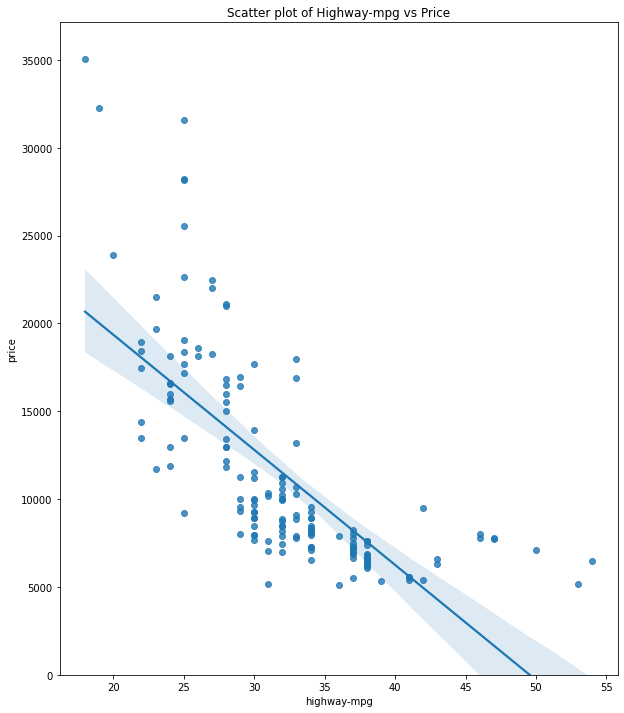

In [8]:
### Scatterplot with Linear Regression 
plt.figure(figsize=(10, 12))
plt.title("Scatter plot of Highway-mpg vs Price")
plt.xlabel("Highway-mpg")
plt.ylabel("Price")

sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0, )

In [9]:
### Multiple Linear Regression
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df["price"])
MLR_Yhat = lm.predict(Z)

lm.coef_ # Slope
lm.intercept_

print(f"MLR intercept: {lm.intercept_}\nMLR coefficient: {lm.coef_}\nMLR Yhat: {MLR_Yhat[0:5]}")

MLR intercept: -15469.047120325753
MLR coefficient: [20.35983585  8.25411089 33.01845058 22.20517885]
MLR Yhat: [10162.67977044 15160.96637593 15290.86495105 17623.03671533
 10565.83473689]


(0.0, 37129.35140426549)

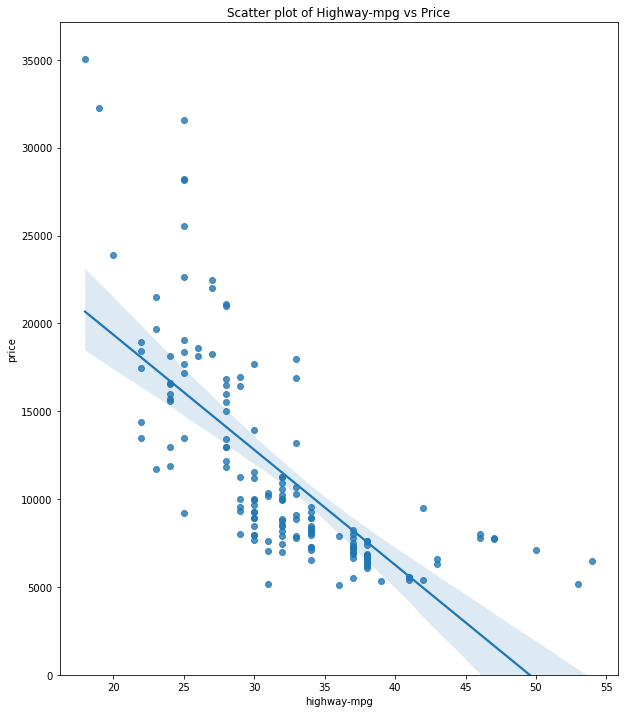

In [10]:
### Scatterplot with Linear Regression 
plt.figure(figsize=(10, 12))
plt.title("Scatter plot of Highway-mpg vs Price")
plt.xlabel("Highway-mpg")
plt.ylabel("Price")

sns.regplot(x = "highway-mpg", y = "price", data = df)
plt.ylim(0, )

No handles with labels found to put in legend.


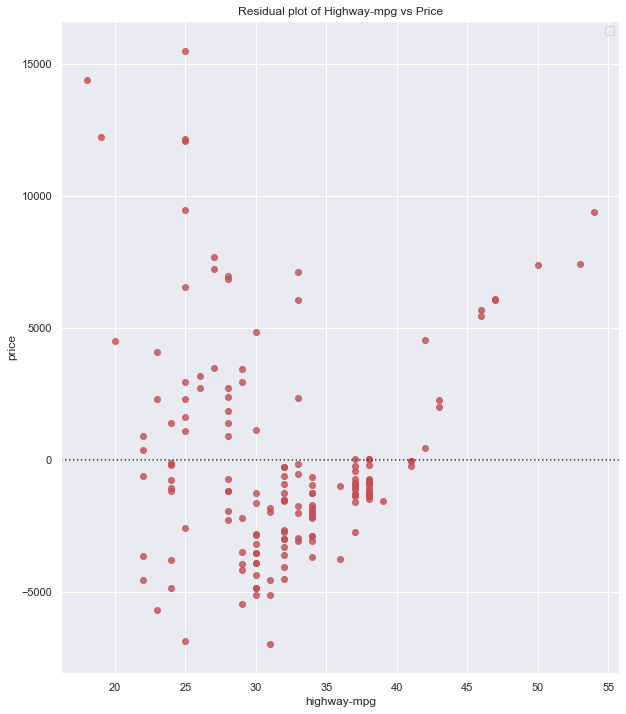

In [12]:
### Residualplot 
plt.figure(figsize = (10, 12))
plt.title("Residual plot of Highway-mpg vs Price")

sns.set(style="darkgrid", color_codes = True)
sns.residplot(df[["highway-mpg"]], df["price"], color = "r")

plt.legend()
plt.show()

/Users/jk/.local/share/virtualenvs/storefront-IGELShD9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/jk/.local/share/virtualenvs/storefront-IGELShD9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


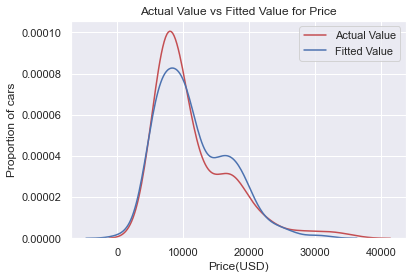

In [14]:
### Multiple Linear Regression Vidualization 
ax1 = sns.distplot(df["price"], hist = False, color = "r", label = "Actual Value")
sns.distplot(MLR_Yhat, hist = False, color = "b", label = "Fitted Value")

plt.title("Actual Value vs Fitted Value for Price")
plt.xlabel("Price(USD)")
plt.ylabel("Proportion of cars")

plt.legend()
plt.show()
plt.close()

In [15]:
### Polynomial Regression with more than one dimension
pr = PolynomialFeatures(degree = 2, include_bias = False) # degree = number of variables
x_polly = pr.fit_transform(df[["horsepower", "curb-weight"]])

In [18]:
### Pre-processing
SCALE = StandardScaler()
SCALE.fit(x_polly)
x_scale = SCALE.transform(x_polly)
print(x_scale[0:5])

[[ 0.20127869 -0.25839367  0.04134015 -0.07335061 -0.32291084]
 [ 0.62581242  0.75529552  0.45536843  0.62172109  0.6591407 ]
 [ 0.46253021  0.79692547  0.29025612  0.5258114   0.70343331]
 [ 1.44222343  1.30064782  1.39100481  1.48490833  1.26414747]
 [ 0.16862225 -0.13766683  0.01154655 -0.04502024 -0.21567396]]


In [20]:
### Pipelines
## Normalization -> Polynomial transform -> Linear Regression
## Pipeline helps processing Normalization and Polynomial transform
Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 2)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(Z, Y)
yhat = pipe.predict(Z)
print(yhat[0:5])


[10200.05297339 16758.29585478 16034.85613679 19362.40962849
 10504.2015918 ]


In [22]:
### Data Validation Block
## R squared 
# lm=LinearRegression()
# lm.fit(x, y) # Train the model to get the coefficient
# lm.intercept_
# lm.coef_ # Caluclating the coefficient value between x and y (y=b0+b1x), this value represents how much of price (y) will be affected by variable of highway-mpg (x), in this data, approximately $655
# lm.score(x, y) # R squared (percentage of variation between x and y) ex: R2 -> highway-mpg has 51.85% of variation on the price

# y_data = {"predicted-price": lm.predict(x)}
# y_df = pd.DataFrame(y_data)
# df["predicted-price"] = y_df

# df = df[['make', 'city-mpg', 'highway-mpg', 'price', 'predicted-price', 'symboling', 'aspiration', 'num-of-doors', # Rearranging columns
#          'body-style', 'drive-wheels', 'horsepower', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
#          'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
#          'compression-ratio', 'peak-rpm', 'normalized-losses']]